In [1]:
%pylab inline
import pandas as pd
from IPython.display import display, HTML


Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet
reload(fastparquet)

<module 'fastparquet' from '/home/spark/anaconda2/lib/python2.7/site-packages/fastparquet/__init__.pyc'>

In [3]:
%time train = fastparquet.ParquetFile('../input/train.parq').to_pandas()

CPU times: user 20.8 s, sys: 15.1 s, total: 35.9 s
Wall time: 35.9 s


In [5]:
train.head()

customer_id market     date  f_0       f_1       f_2       f_3       f_4  \
0  133900852745      c  5012016  1.0 -0.000018 -0.000015 -0.000017 -0.000015   
1  133900858907      o  5012016  1.0 -0.000018 -0.000018 -0.000018 -0.000018   
2  133900922919      a  5012016  1.0 -0.000018 -0.000016 -0.000018 -0.000016   
3  133901138589      b  5012016  1.0 -0.000018  0.000005 -0.000018  0.000005   
4  133901138589      w  5012016  1.0 -0.000018  0.000008 -0.000018  0.000008   

        f_5       f_6  ...    f_33      f_34      f_35      f_36      f_37  \
0 -0.000018 -0.000015  ...      10 -0.000018 -0.000014 -0.000010  0.000006   
1 -0.000018 -0.000018  ...       0 -0.000018 -0.000018 -0.000018 -0.000013   
2 -0.000018 -0.000007  ...       2 -0.000018 -0.000018 -0.000018 -0.000016   
3 -0.000018  0.000008  ...      10 -0.000018  0.000003  0.000030  0.000068   
4 -0.000018  0.000018  ...       0 -0.000018 -0.000018 -0.000018 -0.000015   

       f_38      f_39  f_40  f_41 target  
0  0.000034 -0.000018     o   234      1  
1 -0.000012 -0.000018     i   891      1  
2 -0.000016 -0.000018     o   774      1  
3  0.000083 -0.000018     o   850      4  
4 -0.000015 -0.000018     o   850      5  

[5 rows x 46 columns]

In [9]:
train.shape

(21938149, 46)

In [6]:
train.customer_id.value_counts().head()

170304396506    134
135255082713    124
174203280833    111
148237566799    108
139111513590    108
Name: customer_id, dtype: int64

In [10]:
len(set(train['customer_id']))

2570488

In [11]:
train[train['customer_id']==133901138589]

customer_id market      date  f_0       f_1       f_2       f_3  \
3         133901138589      b   5012016  1.0 -0.000018  0.000005 -0.000018   
4         133901138589      w   5012016  1.0 -0.000018  0.000008 -0.000018   
2964534   133901138589      b   8012016  1.0 -0.000018  0.000006 -0.000018   
2964535   133901138589      w   8012016  1.0 -0.000018  0.000008 -0.000018   
5194777   133901138589      b   9012016  1.0 -0.000018  0.000005 -0.000018   
5194778   133901138589      w   9012016  1.0 -0.000018  0.000008 -0.000018   
8900156   133901138589      b  11012016  1.0 -0.000018  0.000009 -0.000017   
11110978  133901138589      b  12012016  1.0 -0.000018  0.000011 -0.000017   
13312183  133901138589      b   1012017  1.0 -0.000018  0.000011 -0.000017   
15499772  133901138589      b   2012017  1.0 -0.000018  0.000018 -0.000017   
17668615  133901138589      b   3012017  1.0 -0.000018  0.000019 -0.000018   
19815323  133901138589      b   4012017  1.0 -0.000018  0.000010 -0.000018   

               f_4       f_5       f_6  ...    f_33      f_34      f_35  \
3         0.000005 -0.000018  0.000008  ...      10 -0.000018  0.000003   
4         0.000008 -0.000018  0.000018  ...       0 -0.000018 -0.000018   
2964534   0.000005 -0.000018  0.000009  ...      10 -0.000018  0.000005   
2964535   0.000008 -0.000018  0.000018  ...       0 -0.000018 -0.000018   
5194777   0.000004 -0.000018  0.000006  ...      10 -0.000018  0.000006   
5194778   0.000008 -0.000018  0.000018  ...       0 -0.000018 -0.000018   
8900156   0.000009 -0.000018  0.000014  ...      10 -0.000018  0.000005   
11110978  0.000010 -0.000018  0.000019  ...      10 -0.000018 -0.000001   
13312183  0.000010 -0.000018  0.000019  ...      10 -0.000018 -0.000001   
15499772  0.000017 -0.000018  0.000010  ...      10 -0.000018 -0.000004   
17668615  0.000019 -0.000018  0.000018  ...      11 -0.000018 -0.000008   
19815323  0.000010 -0.000018  0.000018  ...      11 -0.000018 -0.000010   

              f_36      f_37      f_38      f_39  f_40  f_41 target  
3         0.000030  0.000068  0.000083 -0.000018     o   850      4  
4        -0.000018 -0.000015 -0.000015 -0.000018     o   850      5  
2964534   0.000035  0.000073  0.000100 -0.000018     o   850      4  
2964535  -0.000018 -0.000015 -0.000015 -0.000018     o   850      5  
5194777   0.000044  0.000091  0.000125 -0.000018     o   850      4  
5194778  -0.000018 -0.000015 -0.000015 -0.000018     o   850      5  
8900156   0.000045  0.000109  0.000154 -0.000018     o   850      4  
11110978  0.000037  0.000109  0.000163 -0.000018     o   850      4  
13312183  0.000037  0.000109  0.000163 -0.000018     o   850      4  
15499772  0.000023  0.000087  0.000168 -0.000018     o   850      4  
17668615  0.000016  0.000065  0.000165 -0.000018     o   850      7  
19815323  0.000004  0.000042  0.000155 -0.000018     o   850     10  

[12 rows x 46 columns]

In [16]:
train['date'].value_counts().sort_index()

1012017     2187589
2012017     2168841
3012017     2146708
4012017     2122833
5012016     2220431
7012016      744099
8012016     2230243
9012016     2225071
10012016    1480306
11012016    2210823
12012016    2201205
Name: date, dtype: int64

In [25]:
W=[]
for i in range(21):
    b=[]
    for j in range(21):
        b.append((i-j)**2/20.0**2)
    W.append(b)
W=np.array(W)

In [26]:
pd.DataFrame(W)

0       1       2       3       4       5       6       7       8   \
0   0.0000  0.0025  0.0100  0.0225  0.0400  0.0625  0.0900  0.1225  0.1600   
1   0.0025  0.0000  0.0025  0.0100  0.0225  0.0400  0.0625  0.0900  0.1225   
2   0.0100  0.0025  0.0000  0.0025  0.0100  0.0225  0.0400  0.0625  0.0900   
3   0.0225  0.0100  0.0025  0.0000  0.0025  0.0100  0.0225  0.0400  0.0625   
4   0.0400  0.0225  0.0100  0.0025  0.0000  0.0025  0.0100  0.0225  0.0400   
5   0.0625  0.0400  0.0225  0.0100  0.0025  0.0000  0.0025  0.0100  0.0225   
6   0.0900  0.0625  0.0400  0.0225  0.0100  0.0025  0.0000  0.0025  0.0100   
7   0.1225  0.0900  0.0625  0.0400  0.0225  0.0100  0.0025  0.0000  0.0025   
8   0.1600  0.1225  0.0900  0.0625  0.0400  0.0225  0.0100  0.0025  0.0000   
9   0.2025  0.1600  0.1225  0.0900  0.0625  0.0400  0.0225  0.0100  0.0025   
10  0.2500  0.2025  0.1600  0.1225  0.0900  0.0625  0.0400  0.0225  0.0100   
11  0.3025  0.2500  0.2025  0.1600  0.1225  0.0900  0.0625  0.0400  0.0225   
12  0.3600  0.3025  0.2500  0.2025  0.1600  0.1225  0.0900  0.0625  0.0400   
13  0.4225  0.3600  0.3025  0.2500  0.2025  0.1600  0.1225  0.0900  0.0625   
14  0.4900  0.4225  0.3600  0.3025  0.2500  0.2025  0.1600  0.1225  0.0900   
15  0.5625  0.4900  0.4225  0.3600  0.3025  0.2500  0.2025  0.1600  0.1225   
16  0.6400  0.5625  0.4900  0.4225  0.3600  0.3025  0.2500  0.2025  0.1600   
17  0.7225  0.6400  0.5625  0.4900  0.4225  0.3600  0.3025  0.2500  0.2025   
18  0.8100  0.7225  0.6400  0.5625  0.4900  0.4225  0.3600  0.3025  0.2500   
19  0.9025  0.8100  0.7225  0.6400  0.5625  0.4900  0.4225  0.3600  0.3025   
20  1.0000  0.9025  0.8100  0.7225  0.6400  0.5625  0.4900  0.4225  0.3600   

        9    ...        11      12      13      14      15      16      17  \
0   0.2025   ...    0.3025  0.3600  0.4225  0.4900  0.5625  0.6400  0.7225   
1   0.1600   ...    0.2500  0.3025  0.3600  0.4225  0.4900  0.5625  0.6400   
2   0.1225   ...    0.2025  0.2500  0.3025  0.3600  0.4225  0.4900  0.5625   
3   0.0900   ...    0.1600  0.2025  0.2500  0.3025  0.3600  0.4225  0.4900   
4   0.0625   ...    0.1225  0.1600  0.2025  0.2500  0.3025  0.3600  0.4225   
5   0.0400   ...    0.0900  0.1225  0.1600  0.2025  0.2500  0.3025  0.3600   
6   0.0225   ...    0.0625  0.0900  0.1225  0.1600  0.2025  0.2500  0.3025   
7   0.0100   ...    0.0400  0.0625  0.0900  0.1225  0.1600  0.2025  0.2500   
8   0.0025   ...    0.0225  0.0400  0.0625  0.0900  0.1225  0.1600  0.2025   
9   0.0000   ...    0.0100  0.0225  0.0400  0.0625  0.0900  0.1225  0.1600   
10  0.0025   ...    0.0025  0.0100  0.0225  0.0400  0.0625  0.0900  0.1225   
11  0.0100   ...    0.0000  0.0025  0.0100  0.0225  0.0400  0.0625  0.0900   
12  0.0225   ...    0.0025  0.0000  0.0025  0.0100  0.0225  0.0400  0.0625   
13  0.0400   ...    0.0100  0.0025  0.0000  0.0025  0.0100  0.0225  0.0400   
14  0.0625   ...    0.0225  0.0100  0.0025  0.0000  0.0025  0.0100  0.0225   
15  0.0900   ...    0.0400  0.0225  0.0100  0.0025  0.0000  0.0025  0.0100   
16  0.1225   ...    0.0625  0.0400  0.0225  0.0100  0.0025  0.0000  0.0025   
17  0.1600   ...    0.0900  0.0625  0.0400  0.0225  0.0100  0.0025  0.0000   
18  0.2025   ...    0.1225  0.0900  0.0625  0.0400  0.0225  0.0100  0.0025   
19  0.2500   ...    0.1600  0.1225  0.0900  0.0625  0.0400  0.0225  0.0100   
20  0.3025   ...    0.2025  0.1600  0.1225  0.0900  0.0625  0.0400  0.0225   

        18      19      20  
0   0.8100  0.9025  1.0000  
1   0.7225  0.8100  0.9025  
2   0.6400  0.7225  0.8100  
3   0.5625  0.6400  0.7225  
4   0.4900  0.5625  0.6400  
5   0.4225  0.4900  0.5625  
6   0.3600  0.4225  0.4900  
7   0.3025  0.3600  0.4225  
8   0.2500  0.3025  0.3600  
9   0.2025  0.2500  0.3025  
10  0.1600  0.2025  0.2500  
11  0.1225  0.1600  0.2025  
12  0.0900  0.1225  0.1600  
13  0.0625  0.0900  0.1225  
14  0.0400  0.0625  0.0900  
15  0.0225  0.0400  0.0625  
16  0.0100  0.0225  0.0400  
17  0.0025  0.0100  0.0225  
18  0.0000  0.0025  0.0

In [20]:
D=1012017

In [33]:
def make_E(D):
    df=train[train['date']==D]['target']
    M=df.shape[0]
    vc=df.value_counts().sort_index().values
    E=np.outer(vc,vc)/float(M)
    return E

In [34]:
Elist=[]

In [36]:
for D in sorted(train['date'].value_counts().index):
    print D
    Elist.append(make_E(D))

1012017
2012017
3012017
4012017
5012016
7012016
8012016
9012016
10012016
11012016
12012016


In [39]:
Elist=np.array(Elist)

In [40]:
Elist.shape

(11, 20, 20)

In [45]:
pd.DataFrame(np.mean(Elist,axis=0))

0              1             2             3             4   \
0     901.214729   10648.381228   7024.480015   4888.058927   3524.873221   
1   10648.381228  126123.491544  83192.090548  57867.990745  41716.882010   
2    7024.480015   83192.090548  54874.955841  38171.522274  27518.129763   
3    4888.058927   57867.990745  38171.522274  26554.171132  19144.044692   
4    3524.873221   41716.882010  27518.129763  19144.044692  13802.331809   
5    4599.011580   54418.194468  35896.709682  24973.726320  18005.849384   
6    2785.395910   32950.090408  21735.687326  15122.349466  10903.434280   
7    3107.507477   36750.820290  24243.140764  16867.602467  12162.215267   
8    1629.125416   19259.378187  12704.887302   8840.192046   6374.433314   
9    1571.101953   18568.777523  12249.432282   8523.594163   6146.331647   
10    694.341831    8204.551956   5412.415947   3766.288371   2715.934826   
11    354.048794    4182.432269   2759.116279   1920.047500   1384.625503   
12    366.455766    4328.306766   2855.346833   1987.050787   1432.977567   
13    182.092341    2150.488554   1418.686270    987.293510    712.000464   
14     82.962821     979.951113    646.476830    449.890622    324.440334   
15      4.809485      56.620696     37.357227     26.010935     18.765215   
16      3.455879      40.792246     26.910581     18.729320     13.507779   
17      1.654986      19.619785     12.942149      9.001928      6.489238   
18      1.066823      12.646787      8.342035      5.801779      4.182102   
19      0.233546       2.765604      1.824599      1.269378      0.915221   

              5             6             7             8             9   \
0    4599.011580   2785.395910   3107.507477   1629.125416   1571.101953   
1   54418.194468  32950.090408  36750.820290  19259.378187  18568.777523   
2   35896.709682  21735.687326  24243.140764  12704.887302  12249.432282   
3   24973.726320  15122.349466  16867.602467   8840.192046   8523.594163   
4   18005.849384  10903.434280  12162.215267   6374.433314   6146.331647   
5   23490.011440  14224.679943  15867.277263   8316.575844   8019.142924   
6   14224.679943   8614.206585   9609.200377   5036.695141   4856.692169   
7   15867.277263   9609.200377  10719.466405   5618.875884   5418.200140   
8    8316.575844   5036.695141   5618.875884   2945.472209   2840.377674   
9    8019.142924   4856.692169   5418.200140   2840.377674   2739.123605   
10   3543.564911   2146.165967   2394.360286   1255.238363   1210.515319   
11   1806.610441   1094.205566   1220.784345    640.021030    617.232918   
12   1869.721587   1132.446835   1263.468538    662.412403    638.841662   
13    929.008146    562.689548    627.795459    329.148400    317.439783   
14    423.323562    256.396679    286.062916    149.977582    144.636749   
15     24.490248     14.837668     16.559647      8.687001      8.380524   
16     17.625508     10.675800     11.911598      6.245601      6.023933   
17      8.464219      5.124534      5.715602      2.995057      2.886930   
18      5.454997      3.302847      3.683379      1.929841      1.860690   
19      1.193898      0.722951      0.806440      0.422614      0.407412   

             10           11           12           13          14         15  \
0    694.341831   354.048794   366.455766   182.092341   82.962821   4.809485   
1   8204.551956  4182.432269  4328.306766  2150.488554  979.951113  56.620696   
2   5412.415947  2759.116279  2855.346833  1418.686270  646.476830  37.357227   
3   3766.288371  1920.047500  1987.050787   987.293510  449.890622  26.010935   
4   2715.934826  1384.625503  1432.977567   712.000464  324.440334  18.765215   
5   3543.564911  1806.610441  1869.721587   929.008146  423.323562  24.490248   
6   2146.165967  1094.205566  1132.446835   562.689548  256.396679  14.837668   
7   2394.360286  1220.784345  1263.468538   627.795459  286.062916  16.559647   
8   1255.238363   640.021030   662.412403   329.148400  149.977582   8

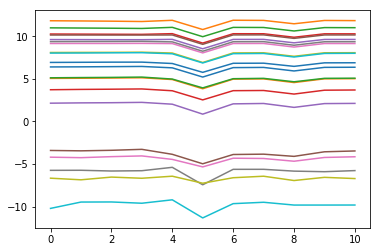

In [42]:
for i in range(20):
    plt.plot(np.log(Elist[:,i,i]))

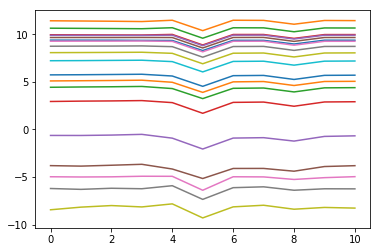

In [46]:
for i in range(1,20):
    plt.plot(np.log(Elist[:,i,i-1]))

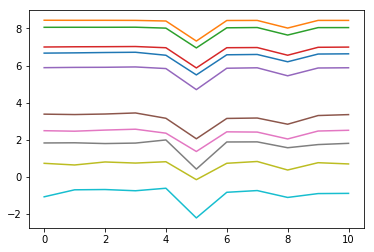

In [47]:
for i in range(10,20):
    plt.plot(np.log(Elist[:,i,i-10]))

In [21]:
df=train[train['date']==D]['target']
df.shape

(2187589,)

In [27]:
M=df.shape[0]

In [28]:
vc=df.value_counts().sort_index().values
vc

array([ 47409, 548112, 361171, 251509, 181590, 237157, 143971, 160908,
        84970,  82089,  36400,  18576,  19250,   9546,   4333,    270,
          182,     84,     53,      9])

In [31]:
E=np.outer(vc,vc)/float(M)

In [32]:
pd.DataFrame(E)

0              1             2             3             4   \
0    1027.438555   11878.575824   7827.227116   5450.653748   3935.382885   
1   11878.575824  137332.362041  90493.305256  63016.910858  45498.335419   
2    7827.227116   90493.305256  59629.341362  41524.142350  29980.513657   
3    5450.653748   63016.910858  41524.142350  28916.207332  20877.559409   
4    3935.382885   45498.335419  29980.513657  20877.559409  15073.639564   
5    5139.620017   59420.941312  39154.626782  27266.145475  19686.211455   
6    3120.111291   36072.695900  23769.615792  16552.470432  11950.916690   
7    3487.166635   40316.350876  26565.914926  18499.731975  13356.843411   
8    1841.453184   21289.683135  14028.549179   9769.074415   7053.291226   
9    1779.016717   20567.833340  13552.896005   9437.843352   6814.141738   
10    788.853665    9120.212618   6009.640933   4184.939493   3021.534667   
11    402.575431    4654.315098   3066.898076   2135.698792   1541.978790   
12    417.182227    4823.189365   3178.175494   2213.189155   1597.926987   
13    206.879041    2391.800815   1576.044845   1097.511879    792.405767   
14     93.903927    1085.656079    715.378411    498.168759    359.678838   
15      5.851387      67.649929     44.577007     31.042134     22.412482   
16      3.944268      45.601063     30.048205     20.924697     15.107673   
17      1.820432      21.046645     13.868402      9.657553      6.972772   
18      1.148606      13.279430      8.750301      6.093456      4.399487   
19      0.195046       2.254998      1.485900      1.034738      0.747083   

              5             6             7             8             9   \
0    5139.620017   3120.111291   3487.166635   1841.453184   1779.016717   
1   59420.941312  36072.695900  40316.350876  21289.683135  20567.833340   
2   39154.626782  23769.615792  26565.914926  14028.549179  13552.896005   
3   27266.145475  16552.470432  18499.731975   9769.074415   9437.843352   
4   19686.211455  11950.916690  13356.843411   7053.291226   6814.141738   
5   25710.242029  15607.927470  17444.071330   9211.616209   8899.286371   
6   15607.927470   9475.111111  10589.779738   5592.099736   5402.493530   
7   17444.071330  10589.779738  11835.579930   6249.964120   6038.052309   
8    9211.616209   5592.099736   6249.964120   3300.391847   3188.488482   
9    8899.286371   5402.493530   6038.052309   3188.488482   3080.379322   
10   3946.131929   2395.579974   2677.400188   1413.843277   1365.905387   
11   2013.828206   1222.535538   1366.356755    721.526173    697.062046   
12   2086.896693   1266.893256   1415.932792    747.705579    722.353811   
13   1034.883939    628.247429    702.155555    370.784284    358.212440   
14    469.741474    285.166155    318.713599    168.301729    162.595276   
15     29.270759     17.769412     19.859837     10.487299     10.131716   
16     19.730660     11.977900     13.387001      7.069216      6.829527   
17      9.106458      5.528261      6.178616      3.262715      3.152089   
18      5.745742      3.488070      3.898412      2.058618      1.988818   
19      0.975692      0.592314      0.661995      0.349577      0.337724   

             10           11           12           13           14  \
0    788.853665   402.575431   417.182227   206.879041    93.903927   
1   9120.212618  4654.315098  4823.189365  2391.800815  1085.656079   
2   6009.640933  3066.898076  3178.175494  1576.044845   715.378411   
3   4184.939493  2135.698792  2213.189155  1097.511879   498.168759   
4   3021.534667  1541.978790  1597.926987   792.405767   359.678838   
5   3946.131929  2013.828206  2086.896693  1034.883939   469.741474   
6   2395.579974  1222.535538  1266.893256   628.247429   285.166155   
7   2677.400188  1366.356755  1415.932792   702.155555   318.713599   
8   1413.843277   721.526173   747.705579   370.784284   168.301729   
9   1365.905387   697.062046   722.353811   358.212440   162.595276   
10   605.671358   